In [1]:
import numpy as np
import pandas as pd
import torch
# import matplotlib.pyplot as plt
from I_spline import I_S
from g_dcp import g_DCP3
from Theta_estimate import Theta_est
from zeta_estimate import zeta_est
from g_deep import g_D
from CCP_estimation import CCP_est
from iteration_dcp import Est_dcp2
from Least_FDcp import LFDCP
from iteration_deep import Est_deep
from iteration_lcp import Est_Lcp
from Least_FDLcp import LFDLCP
from SUPtest import SUPstat
from SUPtest import SUPtest
from Least_FD import LFD
from iteration_dcp import Est_dcp2H
from iteration_lcp import Est_Lcp
# import random

In [2]:
def set_seed(seed):
    # random.seed(seed)
    np.random.seed(seed)  
    torch.manual_seed(seed) 
set_seed(6)

# hivdata = pd.read_csv('HIV.csv')
p = 3 
n_layer = 3 
n_node = 50 
n_epoch = 200 
n_lr = 5e-4 
m = 20 
# hivdata = pd.read_csv('HIV.csv')
rotdata = pd.read_csv('rot.csv')
U = np.array(rotdata['rtime'], dtype='float32')
#U = np.log(U)
#U = np.clip(U, 0.01, np.max(U))


De = np.array(rotdata['recur'], dtype='float32') # censoring rate

Z = np.array(rotdata[["chemo"]], dtype='float32') #  covariate
Z_2 = np.array(rotdata[["age"]], dtype='float32')
X = np.array(rotdata[["meno","size","grade","nodes","pgr","er","hormon"]], dtype='float32')
#print(U)
tau = np.max(U)
nodevec = np.array(np.linspace(0, tau, m+2), dtype="float32")

m0 = 4 
nodevec0 = np.array(np.linspace(0, 2, m0+2), dtype="float32")

In [3]:
n = 2982
n1 = 2982
n2 = n-n1
Z_train = Z[np.arange(n1)]
Z_train = Z_train.T
Z_train = Z_train.reshape(n1,)
print(Z_train.shape)
Z_test = np.delete(Z,np.arange(n1))
Z_test = Z_test.T
Z_test = Z_test.reshape(n2,)
Z_2_train = Z_2[np.arange(n1)]
Z_2_train = Z_2_train.T
Z_2_train = Z_2_train.reshape(n1,)
Z_2_test = np.delete(Z_2,np.arange(n1))
Z_2_test = Z_2_test.T
Z_2_test = Z_2_test.reshape(n2,)
X_train = X[np.arange(n1)]
X_test = np.delete(X,np.arange(n1),axis=0)
print(np.shape(X_test))
U_train = U[np.arange(n1)]
U_train = U_train.T
U_train = U_train.reshape(n1,)
U_test = np.delete(U,np.arange(n1))
U_test = U_test.T
U_test = U_test.reshape(n2,)
De_train = De[np.arange(n1)]
De_train = De_train.T
De_train = De_train.reshape(n1,)
De_test = np.delete(De,np.arange(n1))
De_test = De_test.T
De_test = De_test.reshape(n2,)
print(np.mean(De))
print(np.mean(De_train))
print(np.shape(X_train))
print(De_test.shape)


(2982,)
(0, 7)
0.5090543
0.5090543
(2982, 7)
(0,)


In [4]:
from iteration_dcp import Est_dcp2H
from iteration_lcp import Est_Lcp
set_seed(1924)
train_data = {'Z': Z_train, 
                  'X': X_train,
                  'Z_2': Z_2_train,
                  'U': U_train,
                  'De': De_train,
                  'g_X': np.ones(n1)}
test_data = {'Z': Z_test, 
                  'X': X_test,
                  'Z_2': Z_2_test,
                  'U': U_test,
                  'De': De_test,
                  'g_X': np.ones(n2)}
# c0 = np.array(0.1*np.ones(m+p), dtype="float32")
# Theta = np.array([-1,2], dtype='float32')
# Theta0 = np.array([0,1], dtype='float32')
# ResL = Est_Lcp(train_data,X_test,Z_2_test,Theta,Theta0,nodevec,m,c0)
# print(ResL['Theta'])
# print(ResL['zeta'])
# print(ResL['C_index'])

c0 = np.array(0.1*np.ones(m+p), dtype="float32")
Theta = np.array([-1,2], dtype='float32')
Theta0 = np.array([0,1], dtype='float32')
ResD = Est_dcp2H(train_data,X_test,Z_2_test,Theta,Theta0,3,64,5e-4,200,nodevec,m,c0,seq=1)

print(ResD['Theta'])
print(ResD['zeta'])
print(ResD['C_index'])

[-0.5831505   0.35081369]
48.0
1


In [7]:
train_data = {'Z': Z_train, 
                  'X': X_train,
                  'Z_2': Z_2_train,
                  'U': U_train,
                  'De': De_train,
                  'g_X': np.ones(n1)}
test_data = {'Z': Z_test, 
                  'X': X_test,
                  'Z_2': Z_2_test,
                  'U': U_test,
                  'De': De_test,
                  'g_X': np.ones(n2)}

# biass = []
# for i in range(500):
#     set_seed(1700+i)
#     print('n=', 2500, 'i=', i )
#     c0 = np.array(0.1*np.ones(m+p), dtype="float32")
#     Theta = np.array([-1,2], dtype='float32')
#     Theta0 = np.array([0,1], dtype='float32')
#     ResL = Est_Lcp(train_data,X_test,Z_2_test,Theta,Theta0,nodevec,m,c0)
#     c0 = np.array(0.1*np.ones(m+p), dtype="float32")
#     Theta = np.array([-1,2], dtype='float32')
#     Theta0 = np.array([0,1], dtype='float32')
#     ResD = Est_dcp2H(train_data,X_test,Z_2_test,Theta,Theta0,3,64,5e-4,200,nodevec,m,c0,seq=1)
#     bias = np.abs(ResL['zeta']-ResD['zeta'])
#     biass.append(bias)
# biasmin = np.min(biass)
# loc = biass.index(biasmin)
# print(biasmin)
# print(loc)
# print(biass)

# set_seed(2031)
# c0 = np.array(0.1*np.ones(m+p), dtype="float32")
# Theta = np.array([-1,2], dtype='float32')
# Theta0 = np.array([0,1], dtype='float32')
# ResL = Est_Lcp(train_data,X_test,Z_2_test,Theta,Theta0,nodevec,m,c0)
# c0 = np.array(0.1*np.ones(m+p), dtype="float32")
# Theta = np.array([-1,2], dtype='float32')
# Theta0 = np.array([0,1], dtype='float32')
# ResD = Est_dcp2H(train_data,X_test,Z_2_test,Theta,Theta0,3,64,4.8e-4,200,nodevec,m,c0,seq=0.01)
# print(ResL['Theta'])
# print(ResL['zeta'])
# print(ResD['Theta'])
# print(ResD['zeta'])

SUPtest(train_data,test_data,alpha=0.05,n_lr=5e-4,n_epoch=200,B=1000,seed=1924)

RuntimeError: mat1 and mat2 shapes cannot be multiplied (1x0 and 7x64)

In [9]:
set_seed(1924)
tau = np.max(U)
nodevec = np.array(np.linspace(0, tau, m+2), dtype="float32")
m0 = 4 
nodevec0 = np.array(np.linspace(0, 2, m0+2), dtype="float32")
c0 = np.array(0.1*np.ones(m+p), dtype="float32")
Theta = np.array([-1,2], dtype='float32')
Theta0 = np.array([0,1], dtype='float32')
ResL = Est_Lcp(train_data,X_test,Z_2_test,Theta,Theta0,nodevec,m,c0)
print(ResL['Theta'])
print(ResL['zeta'])
Theta_resL = ResL['Theta']
zeta_resL = ResL['zeta']
Res_trainL = ResL['Res_train']
U_train = train_data['U']
Lambda_U_resL = I_S(m,ResL['c'],U_train,nodevec)
ab = LFDLCP(train_data,Lambda_U_resL,Res_trainL,Theta_resL,zeta_resL)
se1L = ab['se1']
print(se1L)
se2L = ab['se2']
print(se2L)
print(Theta_resL[0]-1.96*se1L,Theta_resL[0]+1.96*se1L)
print(Theta_resL[1]-1.96*se2L,Theta_resL[1]+1.96*se2L)

c:\Users\txw\Desktop\cpdnn\Model_Realdata\g_Lcp.py:92: RuntimeWarning: overflow encountered in exp
  Lam = Lambda_U * np.exp(ZXC @ args[0])
c:\Users\txw\Desktop\cpdnn\Model_Realdata\g_Lcp.py:93: RuntimeWarning: invalid value encountered in multiply
  Loss_F = np.mean(-De_train * np.log(1 - np.exp(-Lam) + 1e-5) + (1 - De_train) * Lam)


[-0.00512943 -0.01807769]
41.00039
0.13740958771744205
0.1605362841207723
-0.2744522203773083 0.2641933634750645
-0.3327288087218566 0.2965734250315708


In [23]:
import scipy.stats as stats
pa1L = 1/se1L
print(pa1L*np.abs(Theta_resL[0]))
print(1-stats.norm.cdf(pa1L*np.abs(Theta_resL[0])))
pa2L = 1/se2L
print(pa2L*np.abs(Theta_resL[1]))
print(1-stats.norm.cdf(pa2L*np.abs(Theta_resL[1])))

0.0531337195855487
0.47881268252249387
0.13355760966527877
0.4468762031857789


In [51]:
from Least_FDcp import LFDCPH
set_seed(1924)
c0 = np.array(0.1*np.ones(m+p), dtype="float32")
Theta = np.array([-1,2], dtype='float32')
Theta0 = np.array([0,1], dtype='float32')
ResD = Est_dcp2H(train_data,X_test,Z_2_test,Theta,Theta0,3,64,5e-4,200,nodevec,m,c0,seq=0.01)
print(ResD['Theta'])
print(ResD['zeta'])
Theta_res = ResD['Theta']
zeta_res = ResD['zeta']
Z1 = Z_train
Z2 = Z_train*(Z_2_train>zeta_res)
a_b1 = LFDCPH(Z1,train_data,I_S(m,ResD['c'],U_train,nodevec),ResD['Res_train'],ResD['Theta'],\
            ResD['zeta'],n_layer=3,n_node=50,n_lr=2.5e-4,n_epoch=200)
a_b2 = LFDCPH(Z2,train_data,I_S(m,ResD['c'],U_train,nodevec),ResD['Res_train'],ResD['Theta'],\
            ResD['zeta'],n_layer=3,n_node=50,n_lr=4e-4,n_epoch=200)
Z_train1 = np.vstack((Z_train, Z_train*(Z_2_train>zeta_res)))
Z_train1 = Z_train1.T  
h_v_deep = I_S(m,ResD['c'],U_train,nodevec) * np.exp(Z_train1@ResD['Theta'] + ResD['Res_train'])
Q_y_deep = h_v_deep * (De_train * np.exp(-h_v_deep)/(1-np.exp(-h_v_deep)+1e-8) - (1-De_train))
Info = np.zeros((2,2))
Info[0,0] = np.mean(Q_y_deep**2 * (Z1-a_b1)**2)
Info[1,1] = np.mean(Q_y_deep**2 * (Z2-a_b2)**2)
Info[0,1] = np.mean(Q_y_deep**2 * (Z1-a_b1)*(Z2-a_b2))
Info[1,0] = Info[0,1]
Sigma = np.linalg.inv(Info)/n
se1 = np.sqrt(Sigma[0,0])
se2 = np.sqrt(Sigma[1,1])
print(se1)
print(se2)
print(Theta_res[0]-1.96*se1,Theta_res[0]+1.96*se1)
print(Theta_res[1]-1.96*se2,Theta_res[1]+1.96*se2)


[-0.5831505   0.35081369]
48.0
0.1246723069268187
0.15083017152452244
-0.8275082242148549 -0.3387927810617256
0.055186550004218515 0.6464408223803464


In [20]:
import scipy.stats as stats
pa1 = 1/se1
print(pa1*np.abs(Theta_res[0]))
print(1-stats.norm.cdf(pa1*np.abs(Theta_res[0])))
pa2 = 1/se2
print(pa2*np.abs(Theta_res[1]))
print(1-stats.norm.cdf(pa2*np.abs(Theta_res[1])))

4.677466207315739
1.4522070935774067e-06
2.3258853493728613
0.010012333907194582


In [100]:
set_seed(1924)
import random
from Least_FDcp import LFDCPH
tau = np.max(U)
nodevec = np.array(np.linspace(0, tau, m+2), dtype="float32")

m0 = 4 
nodevec0 = np.array(np.linspace(0, 2, m0+2), dtype="float32")
n = 2982
n1 = 2800
n2 = n-n1
sap = sorted(random.sample(range(n),n1))
sap1 = np.delete(range(n),sap)
Z_train1 = Z_train[sap]
Z_test1 = Z_train[sap1]
Z_2_train1 = Z_2_train[sap]
Z_2_test1 = Z_2_train[sap1]
X_train1 = X_train[sap,]
X_test1 = X_train[sap1,]
U_train1 = U_train[sap]
U_test1 = U_train[sap1]
De_train1 = De_train[sap]
De_test1 = De_train[sap1]
train_data1 = {'Z': Z_train1, 
                  'X': X_train1,
                  'Z_2': Z_2_train1,
                  'U': U_train1,
                  'De': De_train1,
                  'g_X': np.ones(n1)}
test_data1 = {'Z': Z_test1, 
                  'X': X_test1,
                  'Z_2': Z_2_test1,
                  'U': U_test1,
                  'De': De_test1,
                  'g_X': np.ones(n2)}

c0 = np.array(0.1*np.ones(m+p), dtype="float32")
Theta = np.array([-1,2], dtype='float32')
Theta0 = np.array([0,1], dtype='float32')

ResD = Est_dcp2H(train_data1,X_test1,Z_2_test1,Theta,Theta0,3,64,5e-4,200,nodevec,m,c0,seq=0.01)
print(ResD['Theta'])
print(ResD['zeta'])
print(ResD['C_index'])
Theta_res = ResD['Theta']
zeta_res = ResD['zeta']
Z1 = Z_train1
Z2 = Z_train1*(Z_2_train1>zeta_res)
a_b1 = LFDCPH(Z1,train_data1,I_S(m,ResD['c'],U_train1,nodevec),ResD['Res_train'],ResD['Theta'],\
            ResD['zeta'],n_layer=3,n_node=50,n_lr=2.5e-4,n_epoch=200)
a_b2 = LFDCPH(Z2,train_data1,I_S(m,ResD['c'],U_train1,nodevec),ResD['Res_train'],ResD['Theta'],\
            ResD['zeta'],n_layer=3,n_node=50,n_lr=4e-4,n_epoch=200)
Z_train1C = np.vstack((Z_train1, Z_train1*(Z_2_train1>zeta_res)))
Z_train1C = Z_train1C.T  
h_v_deep = I_S(m,ResD['c'],U_train1,nodevec) * np.exp(Z_train1C@ResD['Theta'] + ResD['Res_train'])
Q_y_deep = h_v_deep * (De_train1 * np.exp(-h_v_deep)/(1-np.exp(-h_v_deep)+1e-8) - (1-De_train1))
Info = np.zeros((2,2))
Info[0,0] = np.mean(Q_y_deep**2 * (Z1-a_b1)**2)
Info[1,1] = np.mean(Q_y_deep**2 * (Z2-a_b2)**2)
Info[0,1] = np.mean(Q_y_deep**2 * (Z1-a_b1)*(Z2-a_b2))
Info[1,0] = Info[0,1]
Sigma = np.linalg.inv(Info)/n
se1 = np.sqrt(Sigma[0,0])
se2 = np.sqrt(Sigma[1,1])
print(se1)
print(se2)
print(Theta_res[0]-1.96*se1,Theta_res[0]+1.96*se1)
print(Theta_res[1]-1.96*se2,Theta_res[1]+1.96*se2)

# c0 = np.array(0.1*np.ones(m+p), dtype="float32")
# Theta = np.array([-1,2], dtype='float32')
# Theta0 = np.array([0,1], dtype='float32')
# ResL = Est_Lcp(train_data,X_test,Z_2_test,Theta,Theta0,nodevec,m,c0)
# print(ResL['Theta'])
# print(ResL['zeta'])
# print(ResL['C_index'])
# Theta_resL = ResL['Theta']
# zeta_resL = ResL['zeta']
# Res_trainL = ResL['Res_train']
# U_train = train_data['U']
# Lambda_U_resL = I_S(m,ResL['c'],U_train,nodevec)
# ab = LFDLCP(train_data,Lambda_U_resL,Res_trainL,Theta_resL,zeta_resL)
# se1L = ab['se1']
# print(se1L)
# se2L = ab['se2']
# print(se2L)
# print(Theta_resL[0]-1.96*se1L,Theta_resL[0]+1.96*se1L)
# print(Theta_resL[1]-1.96*se2L,Theta_resL[1]+1.96*se2L)

[-0.57392681  0.36854671]
48.0
1
0.12774415487095508
0.15359489880225285
-0.8243053500444182 -0.3235482629502742
0.06750070786372636 0.6695927111685576


n= 2900 i= 0
1
n= 2900 i= 1
1
n= 2900 i= 2
1
n= 2900 i= 3
1


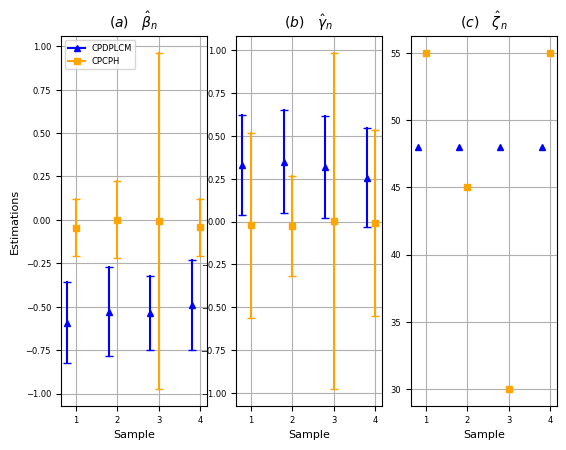

In [49]:
import matplotlib.pyplot as plt
from iteration_dcp import Est_dcp2H
from iteration_lcp import Est_Lcp
import random
from Least_FDcp import LFDCPH

fig1 = plt.figure()
ax1 = fig1.add_subplot(1, 3, 1)
ax1.set_title(r'$(a)\quad {\hat\beta}_n$', fontsize=10) 
ax1.set_xlabel("Sample",fontsize=8)    
ax1.set_ylabel("Estimations",fontsize=8) 
ax1.tick_params(axis='both',labelsize=6) 
ax1.grid(True)

ax2 = fig1.add_subplot(1, 3, 2)
ax2.set_title(r'$(b)\quad {\hat\gamma}_n$', fontsize=10) 
ax2.set_xlabel("Sample",fontsize=8) 
#ax2.set_ylabel("Estimates of effect",fontsize=8) 
ax2.tick_params(axis='both',labelsize=6) 
ax2.grid(True)

ax3 = fig1.add_subplot(1, 3, 3)
ax3.set_title(r'$(c)\quad {\hat\zeta}_n$', fontsize=10) 
ax3.set_xlabel("Sample",fontsize=8) 
#ax3.set_ylabel("Estimates of change point",fontsize=8) 
ax3.tick_params(axis='both',labelsize=6) 
ax3.grid(True)

n = 2982
n1 = 2900
n2 = n-n1

for i in range(4):
    print('n=', n1, 'i=', i )
    set_seed(1924)
    tau = np.max(U)
    nodevec = np.array(np.linspace(0, tau, m+2), dtype="float32")

    m0 = 4 
    nodevec0 = np.array(np.linspace(0, 2, m0+2), dtype="float32")
    random.seed(113+i)
    sap = sorted(random.sample(range(n),n1))
    sap1 = np.delete(range(n),sap)
    Z_train1 = Z_train[sap]
    Z_test1 = Z_train[sap1]
    Z_2_train1 = Z_2_train[sap]
    Z_2_test1 = Z_2_train[sap1]
    X_train1 = X_train[sap,]
    X_test1 = X_train[sap1,]
    U_train1 = U_train[sap]
    U_test1 = U_train[sap1]
    De_train1 = De_train[sap]
    De_test1 = De_train[sap1]
    train_data1 = {'Z': Z_train1, 
                    'X': X_train1,
                    'Z_2': Z_2_train1,
                    'U': U_train1,
                    'De': De_train1,
                    'g_X': np.ones(n1)}
    test_data1 = {'Z': Z_test1, 
                    'X': X_test1,
                    'Z_2': Z_2_test1,
                    'U': U_test1,
                    'De': De_test1,
                    'g_X': np.ones(n2)}
    set_seed(1924)
    c0 = np.array(0.1*np.ones(m+p), dtype="float32")
    Theta = np.array([-1,2], dtype='float32')
    Theta0 = np.array([0,1], dtype='float32')

    ResD = Est_dcp2H(train_data1,X_test1,Z_2_test1,Theta,Theta0,3,64,5e-4,200,nodevec,m,c0,seq=0.01)
    # print(ResD['Theta'])
    # print(ResD['zeta'])
    # print(ResD['C_index'])
    Theta_res = ResD['Theta']
    zeta_res = ResD['zeta']
    Z1 = Z_train1
    Z2 = Z_train1*(Z_2_train1>zeta_res)
    a_b1 = LFDCPH(Z1,train_data1,I_S(m,ResD['c'],U_train1,nodevec),ResD['Res_train'],ResD['Theta'],\
                ResD['zeta'],n_layer=3,n_node=50,n_lr=2.5e-4,n_epoch=200)
    a_b2 = LFDCPH(Z2,train_data1,I_S(m,ResD['c'],U_train1,nodevec),ResD['Res_train'],ResD['Theta'],\
                ResD['zeta'],n_layer=3,n_node=50,n_lr=4e-4,n_epoch=200)
    Z_train1C = np.vstack((Z_train1, Z_train1*(Z_2_train1>zeta_res)))
    Z_train1C = Z_train1C.T  
    h_v_deep = I_S(m,ResD['c'],U_train1,nodevec) * np.exp(Z_train1C@ResD['Theta'] + ResD['Res_train'])
    Q_y_deep = h_v_deep * (De_train1 * np.exp(-h_v_deep)/(1-np.exp(-h_v_deep)+1e-8) - (1-De_train1))
    Info = np.zeros((2,2))
    Info[0,0] = np.mean(Q_y_deep**2 * (Z1-a_b1)**2)
    Info[1,1] = np.mean(Q_y_deep**2 * (Z2-a_b2)**2)
    Info[0,1] = np.mean(Q_y_deep**2 * (Z1-a_b1)*(Z2-a_b2))
    Info[1,0] = Info[0,1]
    Sigma = np.linalg.inv(Info)/n
    se1 = np.sqrt(Sigma[0,0])
    se2 = np.sqrt(Sigma[1,1])

    beta_min = Theta_res[0]-1.96*se1
    beta_max = Theta_res[0]+1.96*se1
    ax1.plot(i+1-0.2, Theta_res[0], marker='^', markersize=4, ls='-', color='blue', label='CPDPLCM')
    if (i == 0):
        ax1.legend(loc='best', fontsize=6)
    ax1.plot((i+1-0.2)*np.ones(2), np.array([beta_min, beta_max]), color='blue', marker='_', ls='-')

    gamma_min = Theta_res[1]-1.96*se2
    gamma_max = Theta_res[1]+1.96*se2
    ax2.plot(i+1-0.2, Theta_res[1], marker='^', markersize=4, ls='-', color='blue', label='CPDPLCM')
    if (i == 0):
        ax1.legend(loc='best', fontsize=6)
    ax2.plot((i+1-0.2)*np.ones(2), np.array([gamma_min, gamma_max]), color='blue', marker='_', ls='-')

    ax3.plot(i+1-0.2, zeta_res, marker='^', markersize=4, ls='-', color='blue', label='CPDPLCM')
    
    c0 = np.array(0.1*np.ones(m+p), dtype="float32")
    Theta = np.array([-1,2], dtype='float32')
    Theta0 = np.array([0,1], dtype='float32')
    ResL = Est_Lcp(train_data1,X_test1,Z_2_test1,Theta,Theta0,nodevec,m,c0)
    # print(ResL['Theta'])
    # print(ResL['zeta'])
    print(ResL['C_index'])
    Theta_resL = ResL['Theta']
    zeta_resL = ResL['zeta']
    Res_trainL = ResL['Res_train']
    U_train1 = train_data1['U']
    Lambda_U_resL = I_S(m,ResL['c'],U_train1,nodevec)
    ab = LFDLCP(train_data1,Lambda_U_resL,Res_trainL,Theta_resL,zeta_resL)
    se1L = ab['se1']
    # print(se1L)
    se2L = ab['se2']
    beta_minL = Theta_resL[0]-1.96*se1L
    beta_maxL = Theta_resL[0]+1.96*se1L
    ax1.plot(i+1, Theta_resL[0], marker='s', markersize=4, ls='-', color='orange', label='CPCPH')
    if (i == 0):
        ax1.legend(loc='best', fontsize=6)
    ax1.plot((i+1)*np.ones(2), np.array([beta_minL, beta_maxL]), color='orange', marker='_', ls='-')
    gamma_minL = Theta_resL[1]-1.96*se2L
    gamma_maxL = Theta_resL[1]+1.96*se2L
    ax2.plot(i+1, Theta_resL[1], marker='s', markersize=4, ls='-', color='orange', label='CPCPH')
    if (i == 0):
        ax1.legend(loc='best', fontsize=6)
    ax2.plot((i+1)*np.ones(2), np.array([gamma_minL, gamma_maxL]), color='orange', marker='_', ls='-')

    ax3.plot(i+1, zeta_resL, marker='s', markersize=4, ls='-', color='orange', label='CPCPH')

In [17]:
fig1.savefig('ROTTDAM.png', dpi=400, bbox_inches='tight')

In [20]:
set_seed(1924)
import random
from Least_FDcp import LFDCPH
n = 2982
n1 = 2982
train_data = {'Z': Z_train, 
                  'X': X_train,
                  'Z_2': Z_2_train,
                  'U': U_train,
                  'De': De_train,
                  'g_X': np.ones(n1)}
test_data = {'Z': Z_test, 
                  'X': X_test,
                  'Z_2': Z_2_test,
                  'U': U_test,
                  'De': De_test,
                  'g_X': np.ones(n2)}
tau = np.max(U)
nodevec = np.array(np.linspace(0, tau, m+2), dtype="float32")

m0 = 4 
nodevec0 = np.array(np.linspace(0, 2, m0+2), dtype="float32")

c0 = np.array(0.1*np.ones(m+p), dtype="float32")
Theta = np.array([-1,2], dtype='float32')
Theta0 = np.array([0,1], dtype='float32')

ResD = Est_dcp2H(train_data,X_test,Z_2_test,Theta,Theta0,3,64,5e-4,200,nodevec,m,c0,seq=0.01)
print(ResD['Theta'])
print(ResD['zeta'])
print(ResD['C_index'])
Theta_res = ResD['Theta']
zeta_res = ResD['zeta']
Z1 = Z_train
Z2 = Z_train*(Z_2_train>zeta_res)
a_b1 = LFDCPH(Z1,train_data,I_S(m,ResD['c'],U_train,nodevec),ResD['Res_train'],ResD['Theta'],\
            ResD['zeta'],n_layer=3,n_node=50,n_lr=2.5e-4,n_epoch=200)
a_b2 = LFDCPH(Z2,train_data,I_S(m,ResD['c'],U_train,nodevec),ResD['Res_train'],ResD['Theta'],\
            ResD['zeta'],n_layer=3,n_node=50,n_lr=4e-4,n_epoch=200)
Z_train1 = np.vstack((Z_train, Z_train*(Z_2_train>zeta_res)))
Z_train1 = Z_train1.T  
h_v_deep = I_S(m,ResD['c'],U_train,nodevec) * np.exp(Z_train1@ResD['Theta'] + ResD['Res_train'])
Q_y_deep = h_v_deep * (De_train * np.exp(-h_v_deep)/(1-np.exp(-h_v_deep)+1e-8) - (1-De_train))
Info = np.zeros((2,2))
Info[0,0] = np.mean(Q_y_deep**2 * (Z1-a_b1)**2)
Info[1,1] = np.mean(Q_y_deep**2 * (Z2-a_b2)**2)
Info[0,1] = np.mean(Q_y_deep**2 * (Z1-a_b1)*(Z2-a_b2))
Info[1,0] = Info[0,1]
Sigma = np.linalg.inv(Info)/n
se1 = np.sqrt(Sigma[0,0])
se2 = np.sqrt(Sigma[1,1])
print(se1)
print(se2)
print(Theta_res[0]-1.96*se1,Theta_res[0]+1.96*se1)
print(Theta_res[1]-1.96*se2,Theta_res[1]+1.96*se2)


[-0.5831505   0.35081369]
48.0
1
0.1246723069268187
0.15083017152452244
-0.8275082242148549 -0.3387927810617256
0.055186550004218515 0.6464408223803464


0.8530233
0.56763357


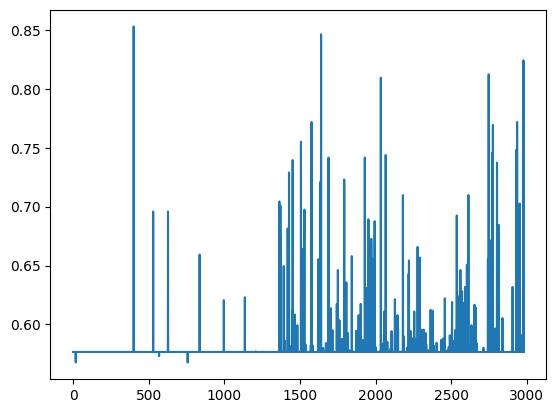

In [40]:
Lambda_deep = I_S(m,ResD['c'],U_train,nodevec)
Lambda_C = Lambda_deep*np.exp(Z_train1@ResD['Theta'] + ResD['Res_train'])
S_deep = np.exp(-Lambda_deep)
print(np.max(S_deep))
print(np.min(S_deep))
plt.plot(S_deep)
# plt.plot((U_train),S_deep)
# plt.plot((U_train),Lambda_deep)

In [54]:
Res_traindeep = ResD['Res_train']
print(Res_traindeep)
dicROT = {'res':Res_traindeep}
result_re = pd.DataFrame(dicROT)
result_re.to_csv('result_re_ROT.csv')

[-0.33501717  0.01409531 -0.50972575 ...  0.78113943 -0.16601819
  0.79194397]
